In [1]:
import formating       #need to import functions to use them 
import analysis
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import xlwings as xw

Testing functions on just one for starters!

In [9]:
file_name = 'data/files naive/hcd_1_is_naive.csv'
df = pd.read_csv(file_name)
df = formating.remove_rows(df, 'productive', True)
df = formating.remove_rows(df, 'is_naive', "Naive")
wide_df = formating.make_combined_rows(df, ['IGH', 'IGK', 'IGL'])
formating.amino_acid_count(wide_df, 'R')
formating.crd3_pKa(wide_df)
gene_counts_df = analysis.get_gene_counts_df(wide_df, ['v_gene', 'j_gene', 'd_gene'])
trim_df = formating.remove_by_threshold(wide_df, gene_counts_df, 0.05)
all_igh, all_iglk = analysis.all_heavyLight_genes([trim_df], ['v_gene', 'j_gene', 'd_gene'])
relRfreq_df = analysis.lightChain_vs_heavyRcount_relFrequency(trim_df, all_iglk, 'IGH_R_count')
all_gene_counts = analysis.get_gene_counts_df(trim_df, ['v_gene', 'j_gene', 'd_gene'])
relRfreq_df = formating.sortCols_byGenes(relRfreq_df, 6, "light_gene")
relF_biDist_df = analysis.binomalDist(relRfreq_df, "Rcount_equalTo_0", "total", "R_equal_0_freq")

The following light chain genes were removed: ['IGLV4-60', 'IGKV6D-21', 'IGKV3D-11', 'IGLV9-49', 'IGLJ7', 'IGKV1-39', 'IGLV5-37', 'IGLV8-61']


In [8]:
import numpy as np 
pairCounts_df = analysis.get_pair_counts(trim_df, ['v_gene', 'j_gene', 'd_gene'])
pairCounts_df.columns
pairMatrix_df = formating.pairDf_to_Matrix(pairCounts_df, all_igh, all_iglk)
normalizedPair_df = analysis.normalize_pairMatrix(pairMatrix_df)

Organizing data from native files. Want to make graphs showing the relative frequenices of heavy chains with 0 Rs and with more the 0 Rs for each light chain (for each paitent: 3 hcd and 3 sle). 

In [10]:
directory = r"C:\Users\tskal\OneDrive\Desktop\Working for Mama!\files naive"
file_names = []
fkeys = []
for path, folders, files in os.walk(directory):
    for filename in files: 
        full_name = "files naive/"+filename
        fkey = filename[:3]+filename[4]
        file_names.append(full_name)
        fkeys.append(fkey)
dfs = []
for f in file_names:
    dfs.append(pd.read_csv(f))
all_igh, all_iglk = analysis.all_heavyLight_genes(dfs, ['v_gene', 'j_gene', 'd_gene'])

In [11]:
needed_genes = [gene for gene in all_iglk if gene.startswith("IGLV") or gene.startswith("IGKV")]
needed_genes.sort()

In [ ]:
count = 0
needed_info = []
trimed_dfs = []
for cur_df in dfs: 
    #removing rows that are not productive or Naive 
    cur_df = utils.remove_rows(cur_df, 'productive', True)
    cur_df = utils.remove_rows(cur_df, 'is_naive', "Naive")
    #reoganizing df so that all information for on cell in on same row
    cur_grouped_df = utils.make_combined_rows(cur_df, ['IGH', 'IGK', 'IGL'])
    cur_gene_counts_df = utils.get_gene_counts_df(cur_grouped_df, ['v_gene', 'j_gene', 'd_gene'])
    trim_df = utils.remove_by_threshold(cur_grouped_df, cur_gene_counts_df, 0.05)
    #adding additional columns 
    utils.amino_acid_count(trim_df, 'R')
    utils.crd3_pKa(trim_df)
    #getting relative frequenices of heavy chain R amounts
    light_rcount_df = utils.lightChain_vs_heavyRcount_relFrequency(trim_df, needed_genes, "IGH_R_count")
    utils.add_ztest_values(light_rcount_df, ['Rcount_gt_0', 'Rcount_equalTo_0'], 'total')
    needed_info.append([fkeys[count], light_rcount_df])
    #PCIK ONE!
    dfs[count] = trim_df
    trimed_dfs.append(trim_df)
    count += 1
print(needed_info[0][1].columns)

The following light chain genes were removed: ['IGLV4-60', 'IGKV6D-21', 'IGKV3D-11', 'IGLV9-49', 'IGLJ7', 'IGKV1-39', 'IGLV5-37', 'IGLV8-61']
The following light chain genes were removed: ['IGKV3D-11', 'IGKV1D-13', 'IGKV2D-28', 'IGLV3-22']
The following light chain genes were removed: ['IGKV3D-7', 'IGKV1D-43', 'IGKV2D-26', 'IGLV4-3']
The following light chain genes were removed: ['IGKV2D-28', 'IGKV3D-11', 'IGKV1D-16', 'IGKV5-2', 'IGLV2-18', 'IGLV5-37', 'IGLJ7']
The following light chain genes were removed: ['IGKV2D-26', 'IGKV3D-11', 'IGKV5-2', 'IGLV5-39']
The following light chain genes were removed: ['IGKV3D-20', 'IGLV5-45', 'IGKV2-18', 'IGKV6D-21', 'IGKV1D-16', 'IGLV5-52']
Index(['light_gene', 'Rcount_equalTo_0', 'Rcount_gt_0', 'total', 'R_gt_0_freq',
       'R_equal_0_freq', 'zstat', 'p_value', 'significant'],
      dtype='object', name='Rcount_type')


In [6]:
h_total_df = needed_info[0][1].copy()
h_total_df = h_total_df.drop(columns=['total', 'R_gt_0_freq','R_equal_0_freq', 'zstat', 'p_value', 'significant'])
h_total_df["Rcount_equalTo_0"] += needed_info[1][1]['Rcount_equalTo_0'] + needed_info[2][1]['Rcount_equalTo_0'] 
h_total_df["Rcount_gt_0"] += needed_info[1][1]['Rcount_gt_0'] + needed_info[2][1]['Rcount_gt_0'] 
h_total_df["Total"] = h_total_df["Rcount_equalTo_0"] + h_total_df["Rcount_gt_0"]
h_total_df['R_gt_0_freq'] = h_total_df['Rcount_gt_0']/h_total_df['Total'] *100
h_total_df['R_equal_0_freq'] = h_total_df['Rcount_equalTo_0']/h_total_df['Total'] *100
utils.add_ztest_values(h_total_df, ['Rcount_gt_0', 'Rcount_equalTo_0'], 'Total')

s_total_df = needed_info[3][1].copy()
s_total_df = s_total_df.drop(columns=['total', 'R_gt_0_freq','R_equal_0_freq', 'zstat', 'p_value', 'significant'])
s_total_df["Rcount_equalTo_0"] += needed_info[4][1]['Rcount_equalTo_0'] + needed_info[5][1]['Rcount_equalTo_0'] 
s_total_df["Rcount_gt_0"] += needed_info[4][1]['Rcount_gt_0'] + needed_info[5][1]['Rcount_gt_0'] 
s_total_df["Total"] = s_total_df["Rcount_equalTo_0"] + s_total_df["Rcount_gt_0"]
s_total_df['R_gt_0_freq'] = s_total_df['Rcount_gt_0']/s_total_df['Total'] *100
s_total_df['R_equal_0_freq'] = s_total_df['Rcount_equalTo_0']/s_total_df['Total'] *100
utils.add_ztest_values(s_total_df, ['Rcount_gt_0', 'Rcount_equalTo_0'], 'Total')

excel_graph_format = {
    "Individual": {
        "tables": [{"data": info[1], "title": f"{info[0]} Heavy Chain R Amount for Each Light Chain",
                "graph_type": "Bar","graph_name": info[0],
                "graph_details": {"x": "light_gene", "y": ["R_gt_0_freq", "R_equal_0_freq"]}}
            for info in needed_info]}, 
    "Totals": {"tables":[
        {"data": h_total_df, "title": f"Total hcd Heavy Chain R Amount for Each Light Chain", "graph_type": "Bar","graph_name": "hcd Totals", 
         "graph_details": {"x": "light_gene", "y": ["R_gt_0_freq", "R_equal_0_freq"]}}, 
        {"data": s_total_df, "title": f"Total sle Heavy Chain R Amount for Each Light Chain", "graph_type": "Bar","graph_name": "sle Totals",
        "graph_details": {"x": "light_gene", "y": ["R_gt_0_freq", "R_equal_0_freq"]}}
    ]}
}   
excel_format = {
    "Individual": {
        "tables": [{"data": info[1], "title": f"{info[0]} Heavy Chain R Amount for Each Light Chain"}
            for info in needed_info]}, 
    "Totals": {"tables":[
        {"data": h_total_df, "title": f"Total hcd Heavy Chain R Amount for Each Light Chain"}, 
        {"data": s_total_df, "title": f"Total sle Heavy Chain R Amount for Each Light Chain"}
    ]}
}   
utils.all_to_excel(excel_format, "naive_R_stuff_ztestNums_alt")

Writing sheet: Individual
Writing sheet: Totals


YOU NEED TO TRY USING https://docs.xlwings.org/en/stable/matplotlib.html MIGHT BE GAME CHANGING!!!!!

<Axes: ylabel='IGK_v_gene'>

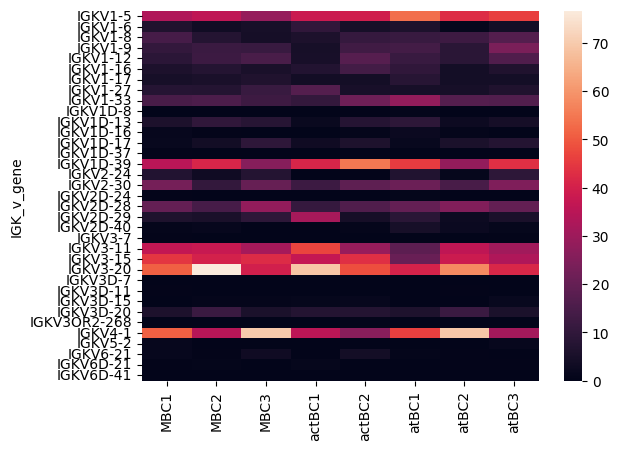

In [5]:
#HEATMAP! TODO: MAKE THIS INTO A FUNCTION HAHA 
file_name = 'data/Atypical_heavy_light_chains.csv'
df = pd.read_csv(file_name)
df = formating.remove_rows(df, 'productive', True)
all_igh, all_iglk = analysis.all_heavyLight_genes([df], ['v_gene'])
all_igl = [gene for gene in all_iglk if gene.startswith("IGL")]
all_igk = [gene for gene in all_iglk if gene.startswith("IGK")]
all_igk.sort()
ksample_df = df[['Sample', 'Celltype (Cluster)', 'IGK_v_gene']].copy().dropna(subset=['IGK_v_gene'])
data = {}
needed_cells = ["MBC1", "MBC2", "MBC3", "actBC1", "actBC2", "atBC1", "atBC2", "atBC3"]
for sample, sample_info in ksample_df.groupby("Sample"):
    samp = {}
    for cell_name, cell_info in sample_info.groupby("Celltype (Cluster)"):
        if cell_name not in needed_cells: continue
        counts = cell_info.value_counts("IGK_v_gene")
        samp[cell_name] = (counts/counts.sum()) * 100 #maybe do log2 instead?
    samp_df = pd.DataFrame.from_dict(samp).fillna(0)
    data[sample] = samp_df
con_df = pd.concat(data.values(), keys=data.keys(), names=["Sample", "IGK_v_gene"])
new_df = con_df.droplevel("Sample").groupby("IGK_v_gene").sum().reset_index()
new_df = formating.sortCols_byGenes(new_df, 6, "IGK_v_gene").set_index("IGK_v_gene")
# plt.figure(figsize=(10, 6))
ax = sns.heatmap(new_df, yticklabels=True, annot=False) 
ax
#plt.show()
# plot_path = os.path.abspath("heatmap.png")
# plt.savefig(plot_path, bbox_inches='tight')
# plt.close()
# sheet = xw.Book().sheets[0]
# print("Image saved to:", plot_path)
# print("Exists?", os.path.exists(plot_path))
# sheet.pictures.add(plot_path, name="rwar", update=True)
# os.remove(plot_path)

<Axes: ylabel='IGK_v_gene'>

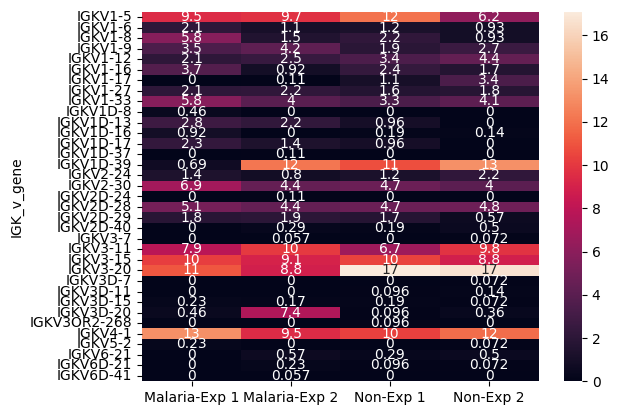

In [4]:
sample_data = {}
noNaive_df = ksample_df[ksample_df['Celltype (Cluster)'] != 'Naive']
for s_name, s_info in noNaive_df.groupby("Sample"):
    couts = s_info.value_counts("IGK_v_gene")
    sample_data[s_name] = (couts/couts.sum()) * 100
bySameple_df = pd.DataFrame.from_dict(sample_data).reset_index().fillna(0)
bySameple_df = formating.sortCols_byGenes(bySameple_df, 6, "IGK_v_gene").set_index("IGK_v_gene")
ax = sns.heatmap(bySameple_df, yticklabels=True, annot=True)
ax

In [4]:
all_igh, all_iglk = utils.all_heavyLight_genes([trim_df], ['v_gene', 'j_gene', 'd_gene'])
needed_Lgenes = [gene for gene in all_iglk if gene.startswith("IGLV") or gene.startswith("IGKV")]
needed_Lgenes.sort()
trim_totals = []
for cell_type, cell_info in trim_df.groupby("Celltype (Cluster)"):
    cell_df = utils.lightChain_vs_heavyRcount_relFrequency(cell_info, needed_Lgenes, "cdr_R_count")
    trim_totals.append([cell_type, cell_df])

Doing same analysis but for different dataset (and splitting by cell type this time)!

In [24]:
f_name = "Atypical_heavy_light_chains.csv"
g_df = pd.read_csv(f_name)
all_igh, all_iglk = utils.all_heavyLight_genes([g_df], ['v_gene', 'j_gene', 'd_gene'])
g_df = utils.remove_rows(g_df, 'productive', True)
#adding additional columns 
utils.amino_acid_count(g_df, 'R')
utils.crd3_pKa(g_df)
needed_Lgenes = [gene for gene in all_iglk if gene.startswith("IGLV") or gene.startswith("IGKV")]
needed_Lgenes.sort()
processed_samples = [] #[[name, [cell type, heavy/light R freq], [cell type, heavy/light R freq], ...], [name, ...]]
for name, sample_info in g_df.groupby("Sample"):
    sample = [name]
    for cell_type, cell_info in sample_info.groupby("Celltype (Cluster)"):
        cell_df = utils.lightChain_vs_heavyRcount_relFrequency(cell_info, needed_Lgenes, "cdr_R_count")
        sample.append([cell_type, cell_df])
    processed_samples.append(sample)

In [28]:
totals = []
for cell_type, cell_info in g_df.groupby("Celltype (Cluster)"):
    cell_df = utils.lightChain_vs_heavyRcount_relFrequency(cell_info, needed_Lgenes, "cdr_R_count")
    totals.append([cell_type, cell_df])
e_format = {}
for sample in processed_samples: 
    e_format[sample[0]] = {"tables": [{"data": info[1], "title": f"{info[0]} Heavy Chain R Amount for Each Light Chain",
                "graph_type": "Bar","graph_name": info[0],
                "graph_details": {"x": "light_gene", "y": ["R_gt_0_freq", "R_equal_0_freq"]}}
            for info in sample[1:]]}
e_format["Total"] = {"tables": [{"data": info[1], "title": f"{info[0]} Heavy Chain R Amount for Each Light Chain",
                "graph_type": "Bar","graph_name": info[0],
                "graph_details": {"x": "light_gene", "y": ["R_gt_0_freq", "R_equal_0_freq"]}}
            for info in totals]}
print("Keys in e_format:", e_format.keys())
utils.all_to_excel(e_format, "R_analysis_Atypical_heavy_light_chains")

Keys in e_format: dict_keys(['Malaria-Exp 1', 'Malaria-Exp 2', 'Non-Exp 1', 'Non-Exp 2', 'Total'])
Writing sheet: Malaria-Exp 1
Writing sheet: Malaria-Exp 2
Writing sheet: Non-Exp 1
Writing sheet: Non-Exp 2
Writing sheet: Total
